# Homework 09: Small Sample Hypothesis Testing, Simple Linear Regression
***

**Name**: Matthew Mayer

***

This assignment is due on Canvas by **6:00PM on Friday November 11**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 01 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do $\color{red}{\text{Kernel}}$ $\color{red}\rightarrow$ $\color{red}{\text{Restart & Run All}}$ as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** $\color{red}{\text{write a summary of the results}}$ in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---

Here are some imports that you might find handy:

In [1]:
import numpy as np 
from scipy import stats
from scipy.stats import t
import pandas as pd
import matplotlib.pylab as plt 
%matplotlib inline

### Recall the general steps in hypothesis testing:

- Determine if the situation calls for a Z-test or a T-test.

- State the null hypothesis

- State the alternate hypothesis

- Set alpha

- collect data

- calculate a test statistic

- Construct acceptance/rejection regions

- Based on the test statistic and the acc./rej. regions, draw a conclusion about the null hypothesis.

# Problem 1
***

In this question you are a quality control engineer inspecting parts made at Cube Aerospace Manufacturing. You will need to decide whether or not to stop the manufacturing process to adjust the calibration of the machines making parts.

The part being inspected at work today is for aircraft. The part has a small port (hole) that must be tightly controlled with a 0.02 dm diameter otherwise catastrophic failure could result in fuel access (too much or too little) for the aircraft.

At various times the engineer takes a small sample of the components from the production line and measures the port diameter and possibly stops the assembly line to make adjustments to the machines if needed. 

At one of the these times four units are taken off the line and measured. The resulting port measurements (in dm) came in at:
$0.021, 0.019, 0.023, 0.020$.

Assuming the port diameters of interest are normally distributed, determine at the 1% level of significance, if there is sufficient evidence in the sample to conclude that processing stop since an adjustment is likely needed.


### Part A

***(2 points)*** Is this a Z-test or a T-test? Describe what you know about the test and its distribution.

Solution:
This is a T-Test due to the small (less than 30) sample size. We also know that since we are grabbing from a normal distribution our test will follow what is known as a t-distribution.

### Part B

***(2 points)*** What is the null hypothesis and what is the alternate hypothesis?

Solution:

$N_0$: The production is fine and the machines don't need to be adjusted. Any major differene is a result of statistical error.

$N_A$: The production is not fine and fitting within a 1% signifcance level and needs to be altered.

### Part C

***(3 points)*** Calculate the proper test statistic.

In [2]:
# Code your solution here:
sample = np.array([0.021, 0.019, 0.023, 0.020])
xbar = sample.mean()
s = sample.std(ddof=1)
t = (xbar-0.02)/(s/np.sqrt(4))
print("The test statistic is:", t)

The test statistic is: 0.8783100656536806


### Part D

***(3 points)*** What is/are the critical value(s)?

Solution:


In [3]:
# Code any needed work here:
crit = stats.t.ppf(.005,3)
print("The critical values are", -1*crit, "and", crit)

The critical values are 5.840909299756432 and -5.840909299756432


### Part E

***(2 points)*** What is the conclusion to our hypothesis test and what does it mean with respect to this problem?


Solution:
Since our test statistic falls inside of the range of our critical values we don't reject the null hypothesis, this means we keep the machines running as they are without recalibration.

### Part F

***(3 points)*** Demonstrate how you would come to this same conclusion using the p-value approach.

Some documentation for `stats.ttest_1samp`: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

and documentation for `t.cdf`:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

In [4]:
# Code your solution here using stats.ttest_1samp
print(stats.ttest_1samp(sample, popmean=0.02))
print("The statistic is the same and p value is not less than .01 so this gets the same conclusion")

Ttest_1sampResult(statistic=0.8783100656536807, pvalue=0.44443808513473027)
The statistic is the same and p value is not less than .01 so this gets the same conclusion


In [5]:
# Code your solution here using t.cdf()
print(1-stats.t.cdf(t, 3))
print("Since .22 is greater than our .1 range we get the same conclusion.")

0.22221904256736513
Since .22 is greater than our .1 range we get the same conclusion.


Review the code below which graphs PDF curves and CDF curves and...

### Part G

***(2 points)*** ...fill in the requested questions/comments found in the code below.

0.8847080673775886

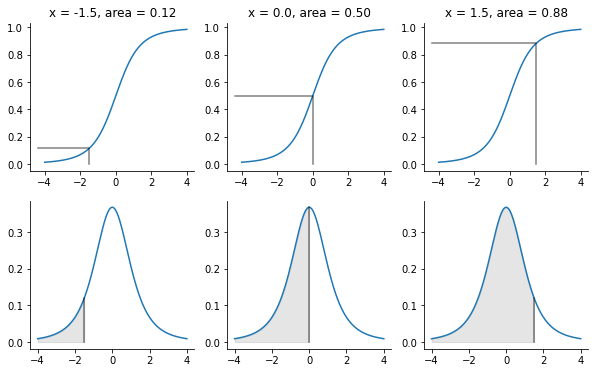

In [6]:
t_dist = stats.t(3)
# What does stats.t(3) mean?
# hint: https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.t.html
# ANSWER: t(3) means that the shape and size are set with 3 as the input. 

t_values = np.linspace(-4, 4, 1000)
# What is contained in the variable 't_values'?
# ANSWER: This fixes the shape, location and scale of the RV object. Contains df, loc, and scale.

#####################################################

   # Set 1 of t-values.
#Lt = -5.84
#Mt = 0
#Ut = 5.84

   # Set 2 of t-values.
Lt = -1.5
Mt = 0
Ut = 1.5

# Try the following code with both sets of t-values above,
#   one set at a time.
# Of course you will need to comment one set out and 
#  un-comment the other set when you try each set.

example_values = (Lt, Mt, Ut)
pdf_values = t_dist.pdf(t_values)
cdf_values = t_dist.cdf(t_values)
fill_color = (0, 0, 0, 0.1)  # Light gray in RGBA format.
line_color = (0, 0, 0, 0.5)  # Medium gray in RGBA format.
fig, axes = plt.subplots(2, len(example_values), figsize=(10, 6))
for i, x in enumerate(example_values):
    cdf_ax, pdf_ax = axes[:, i]
    cdf_ax.plot(t_values, cdf_values)
    pdf_ax.plot(t_values, pdf_values)
    
    # Fill area at and to the left of x.
    pdf_ax.fill_between(t_values, pdf_values,
                        where=t_values <= x,
                        color=fill_color)
      
    # Probability density at this value.
    pd = t_dist.pdf(x) 
    
    # Line showing position of x on x-axis of PDF plot.
    pdf_ax.plot([x, x],
                [0, pd], color=line_color)
    
    # Cumulative distribution value for this x.
    cd = t_dist.cdf(x) 
    
    # Lines showing x and CDF value on CDF plot.
       # x position of y axis on plot.
    x_ax_min = cdf_ax.axis()[0]  
    cdf_ax.plot([x, x, x_ax_min],
                [0, cd, cd], color=line_color)
    cdf_ax.set_title('x = {:.1f}, area = {:.2f}'.format(x, cd))
    
    # Hide top and right axis lines and ticks to reduce clutter.
    for ax in (cdf_ax, pdf_ax):
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        
# Area of PDF at and to the left of 1.5
t_dist.cdf(Ut)


### Part H

***(2 points)*** What do these series of graphs represent?


Solution:

These graphs are the CDFs and PDFs of the T-distribution for different input intervals.

In the t-interval from [-1.5,1.5] the graph covers 12% of the area to 88% of the area.
In the t-interval from [-5.84,5.84] the curve covers 1% to 99% of the area.

# Problem 2
***
Supply line issues have caused a boom in the sale of used cars. In this question you are advising a start-up called CU.com (Cars Used  .com). CU.com would like to know appropriate prices for used cars.

You decide to sample some local car dealerships and you find the following data:

Example:

| Cars Age    | Cars Price  | 
| :---        |    :----:   |
| (in years) | (in dollars) |
| 4 | 6300 |
| 4 | 5800 |
| 5 | 5700 |
| 5 | 4500 |
| 7 | 4500 |
| 7 | 4200 |
| 8 | 4100 |
| 9 | 3100 |
| 10 | 2100 |
| 11 | 2500 |
| 12 | 2200 |


### Part A

***(3 points)*** Make a scatter plot of this data to determine if there is a relationship between the cars age and the cars selling price.

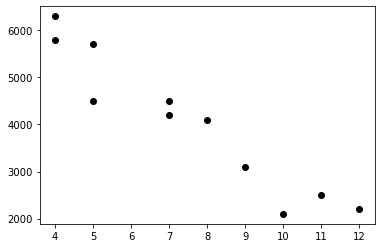

In [7]:
# Code your solution here:
plt.plot(4, 6300, 'o', color='black');
plt.plot(4, 5800, 'o', color='black');
plt.plot(5, 5700, 'o', color ='black');
plt.plot(5, 4500, 'o', color='black');
plt.plot(7, 4500, 'o', color='black');
plt.plot(7, 4200, 'o', color ='black');
plt.plot(8, 4100, 'o', color='black');
plt.plot(9, 3100, 'o', color='black');
plt.plot(10, 2100, 'o', color ='black');
plt.plot(11, 2500, 'o', color='black');
plt.plot(12, 2200, 'o', color='black');

### Part B

***(2 points)*** After viewing the scatterplot, how would you describe the relationship?

Solution: 
I would describe this is a negative linear relationship.

### Part C

***(4 points)*** What is the regression equation for this example? i.e. What is the line of best fit?

Use TeX to write the equation, with the appropriate values, in the cell below:

Solution:

$Y= \beta_0+\beta_1X + \epsilon$

$\hat{\beta_0} = \bar{Y} - \hat{\beta_1}\bar{X}$

$\hat{\beta_1} = \frac{\bar{XY}-\bar{X}*\bar{Y}}{\bar{X^2}-(\bar{X})^2}$


$\bar{X}=(4+4+5+5+7+7+8+9+10+11+12)/11=\frac{82}{11} $

$\bar{Y}=(6300+5800+5700+4500+4500+4200+4100+3100+2100+2500+2200)/11=\frac{45000}{11}$

$(\bar{X})^2 = \frac{6724}{121}$

$\bar{XY}=\frac{(4*6300)+(4*5800)+(5*5700)+(5*4500)+(7*4500)+(7*4200)+(8*4100)+(9*3100)+(10*2100)+(11*2500)+(12*2200)}{11}=\frac{295900}{11}$

$\bar{X^2}=\frac{4^2+4^2+5^2+5^2+7^2+7^2+8^2+9^2+10^2+11^2+12^2}{11}=\frac{690}{11}$

$\hat{\beta_1}=\frac{\frac{295900}{11} - (\frac{82}{11}*\frac{45000}{11})}{\frac{690}{11}-\frac{6724}{121}}\approx-502.425$

$\hat{\beta_0} = \frac{45000}{11} - (-502.425*\frac{82}{11})\approx 7836.26$

$Y = 7836.26 + -502.425X$

### Part D

***(2 points)*** Draw the same scatterplot as above, but this time add the line of best fit on top of the scatterplot.

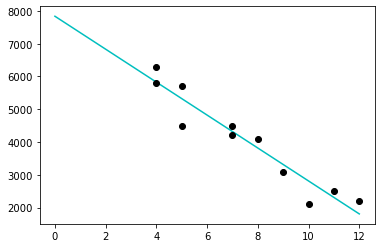

In [8]:
# Code your solution here:
x = np.linspace(0,12,100)
y = -502.425*x+7836.26
plt.plot(x, y, '-c')
plt.plot(4, 6300, 'o', color='black');
plt.plot(4, 5800, 'o', color='black');
plt.plot(5, 5700, 'o', color ='black');
plt.plot(5, 4500, 'o', color='black');
plt.plot(7, 4500, 'o', color='black');
plt.plot(7, 4200, 'o', color ='black');
plt.plot(8, 4100, 'o', color='black');
plt.plot(9, 3100, 'o', color='black');
plt.plot(10, 2100, 'o', color ='black');
plt.plot(11, 2500, 'o', color='black');
plt.plot(12, 2200, 'o', color='black');

### Part E

***(2 points)*** Interpret meaning of the regression line. What does $b_1$ (aka $\beta$ ) indicate relative to this problem?

Solution:
$\beta$ is the slope or relationship between the age of a car in years and the price you can get from that car.

# Problem 3
***
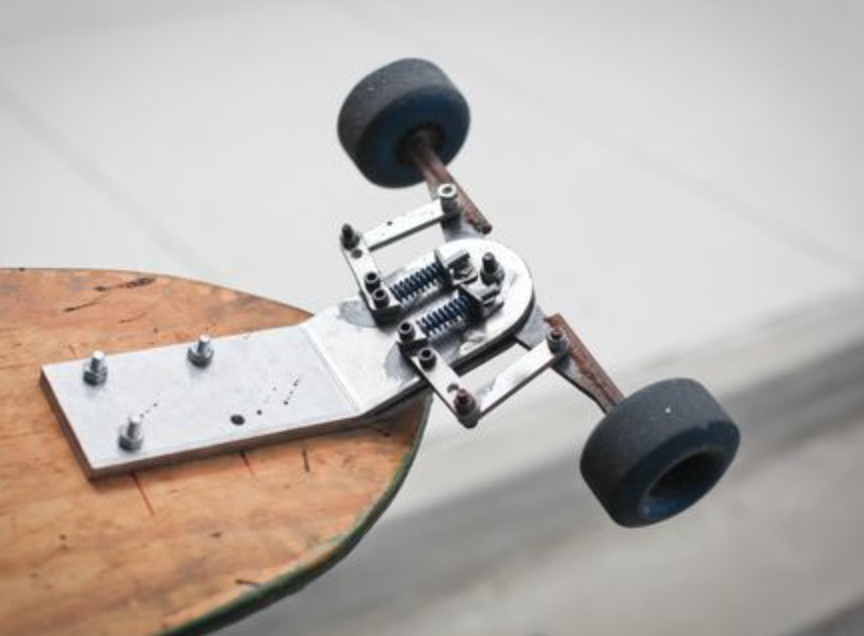

You have invented a new skateboard truck! You go on the TV show "Shark Tank" and Mark Cuban gives you funding for your venture.

In an attempt to market the truck properly you consider two experimental packaging designs; $\color{red}{\text{Design A}}$ and $\color{blue}{\text{Design B}}$. 

$\phantom{x}$

$\color{red}{\text{Design A}}$ is sent to 11 stores and their average sales the first month is 52 units with sample standard deviation 12 units.

$\color{blue}{\text{Design B}}$ is sent to 6 stores and their average sales the first month are 46 units with sample standard deviation 10 units.


### Part A

***(2 points)*** What is a point estimate for the difference in average sales between the two package designs and what does the point estimate mean?

Solution:
The point estimate for the difference in aerage sales is $52-46=6$. This means that we estimate the design A gets 6 more average montly sales than design B.

But how accurate is this point estimate? We can answer this by creating a 95% confidence interval for the point estimate. Follow the steps below:

### Part B

***(3 points)*** What is the critical t-value?

Solution:


In [9]:
# Code here if needed:
a = .05
q = 1-(a/2)
df = 11+6-2
crit = stats.t.ppf(q, df)
print("The critical value is", crit)

The critical value is 2.131449545559323


### Part C

***(3 points)*** What is the 95% confidence interval for the point estimate? Either calculate it by 'hand' in the code or look up documentation on `stats.t.interval()`


In [10]:
# Code solution here:
da=52
db=46
sda=12
sdb=10

leftCI=((52-46)-0)-crit*(np.sqrt(((sda**2)/11)+((sdb**2)/6)))
rightCI=((52-46)-0)+crit*(np.sqrt(((sda**2)/11)+((sdb**2)/6)))
print("The confidence interval is: [", leftCI, ",", rightCI,"]")


The confidence interval is: [ -5.627164870160184 , 17.627164870160186 ]


### Part D

***(2 points)*** Interpret the CI in terms of this problem.

Solution:
The CI in this problem means that 95% of the time the average difference in sales between product A and B fall within the interval. Our point estimate is in this interval but so is 0 so it's hard to make any certain conclusions.

### Part E

Test at the 1% level of significance whether the data provide sufficient evidence to conclude that the mean sales per month of the two designs are different. Use the critical value approach.


***(2 points)*** List the null and alternate hypothesis.

Solution:

N_0: The null hypothesis is that Product A and Product B sell at the same average rate. $\mu_A=\mu_B$. Any major difference is a result of statistical error.

N_A: The alternative hypothesis is that the products do not sell at the same average rates.

### Part F

***(2 points)*** What is the test statistic?

Solution:


In [11]:
# Code here if needed:
test = (da-db-0)/(np.sqrt(((sda**2)/11)+((sdb**2)/6)))
print(test)

1.0998981622920558


### Part G

***(2 points)*** What is the critical value?

Solution:


In [25]:
# Code solution here if needed:
critval = stats.t.ppf(1-(.01/2), df)
print("The critical values is:", critval)

The critical values is: 2.946712883338615


### Part H

***(2 points)*** Interpret your findings with respect to this problem.   

Solution:

Since the t-score is smaller than the critical value we fail to reject the null hypothesis and thus fail to demonstrate that there is a signifigant difference between the average sales of the two designs.